# Diamond sensor data collection and analysis

xchong@lbl.gov, awojdyla@lbl.gov, May 2024

# Step 1: Move the m101 pitch slightly and see what happens

In [ ]:
import epics
import bluesky
import numpy as np

In [ ]:
from bluesky import RunEngine
RE = RunEngine({})

from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

In [ ]:
from ophyd import EpicsMotor
import ophyd
#ophyd.set_cl('caproto')

#for diode_mA, use EpicsSignal() instead of EpicsMotor
diode_mA = ophyd.EpicsSignal('bl201-beamstop:current', name='photodiode') 
diode_mA.wait_for_connection(timeout=2.0)
diode_mA.read()

In [ ]:
#For the 1st experiment on 20231215, we use mono_angle_deg only (which does not work, no edge found)
#pv_mono_angle_deg = 'bl531_xps1:mono_angle_deg'
#pv_photodiode_mA  = 'bl201-beamstop:current'


pv_m101_pitch_mm  = 'bl531_esp300:m101_pitch_mm'
# #pv_m101_bend_um   = 'bl531_esp300:m101_bend_um'
# pv_mono_height_mm = 'bl531_xps1:mono_height_mm'

In [ ]:
m101_pitch_mm = EpicsMotor(pv_m101_pitch_mm, name='m101_pitch_mm')
m101_pitch_mm.wait_for_connection(timeout=2.0)
m101_pitch_mm.read()

In [ ]:
#Run this line before starting angle scan, otherwise the edge does not look good
m101_pitch_mm.read()

In [ ]:
m101_pitch_mm.move(0.819982)

# Step 2 Get the diamond sensor image

# parse the ice-cream data

In [1]:
def find_all(sub,s):
    index_list=[]
    index = s.find(sub)
    while index!=-1:
        index_list.append(index)
        index = s.find(sub,index+1)
    if len(index_list)>0:
        return index_list
    else:
        return -1

In [2]:
import subprocess
import numpy as np

# cmd = "pvget ice-cream/image"
# process = subprocess.Popen(cmd.split(),
#                      stdout=subprocess.PIPE)
# processed, _ = process.communicate()
# ice_cream= processed.decode("utf-8")
# x = ice_cream.split('\n')
# for i in range (len(x)):
#     print(i,x[i])
# start = find_all("[",x[2])[-1]
# end = find_all("]",x[2])[-1]
# value = x[2][start+1:end].split(',')
# res = [eval(i) for i in value]
# res = np.resize(np.array(res),(50,48))
# process.kill()
# process.terminate()

In [9]:
import subprocess
output = subprocess.getoutput('pvget ice-cream/image')
x = output.split('\n')
for i in range (len(x)):
    print(i,x[i])
start = find_all("[",x[2])[-1]
end = find_all("]",x[2])[-1]
value = x[2][start+1:end].split(',')
res = [eval(i) for i in value]
res = np.resize(np.array(res),(50,48))

0 ice-cream/image structure 
1     any value
2         int[]  [14,-3,22,-14,41,-39,10,-36,26,-22,48,-63,52,-20,49,-61,51,-25,38,-15,23,-34,11,-24,45,-22,1,-23,22,-18,28,5,16,53,28,45,33,33,18,56,11,9,-16,18,15,69,-26,41,-22,44,65,24,78,-24,29,55,36,-16,29,8,34,-55,101,29,26,-3,7,50,11,-8,-2,-13,59,-17,-14,7,30,56,1,30,19,26,33,-22,43,12,0,1,1,26,-45,83,2,83,-31,2,17,24,14,15,38,4,19,-31,50,-48,20,-32,22,-19,27,-40,41,-15,29,-51,54,-30,21,-10,39,-34,20,3,29,-31,17,1,17,-8,14,0,5,12,7,3,-6,4,-4,36,25,11,7,26,16,32,-22,27,-13,58,16,10,51,-7,31,55,27,8,45,9,14,-66,58,34,7,-6,-22,66,-9,-23,-15,-21,38,-21,22,7,15,59,11,-10,42,8,27,-7,56,16,-9,-11,2,20,-40,85,-18,41,-34,-16,23,8,13,2,13,0,-2,8,22,-34,18,-10,27,-26,-3,-11,27,-16,19,-23,28,-1,18,-21,22,-30,6,-9,21,-14,19,-21,4,2,6,8,7,-1,9,-10,-7,-13,-24,22,-5,18,8,24,37,51,4,18,-3,40,49,41,74,3,71,33,18,42,18,-20,35,-62,94,-1,32,-16,20,67,2,-27,-2,-30,35,-11,7,-9,19,48,-4,0,48,14,19,-8,27,33,-21,10,-3,32,-39,56,-19,47,-69,10,26,17,3,11,-9,7,-6

In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
# subprocess = os.popen('pvget ice-cream/image')
# ice_cream = subprocess.read()
# x = ice_cream.split('\n')
# for i in range (len(x)):
#     print(i,x[i])
# start = find_all("[",x[2])[-1]
# end = find_all("]",x[2])[-1]
# value = x[2][start+1:end].split(',')
# res = [eval(i) for i in value]
# res = np.resize(np.array(res),(50,48))
# subprocess.close()


0 ice-cream/image structure 
1     any value
2         int[]  [60,-52,23,-28,60,-36,62,-48,41,-41,42,-35,30,0,21,-31,18,-14,2,16,3,-17,0,-9,-1,9,22,-26,5,20,-14,22,12,40,14,48,6,68,3,52,-33,49,-30,33,-34,47,-29,34,-19,51,-3,43,7,-10,21,-21,140,19,-18,13,18,5,56,18,21,21,71,59,2,31,19,17,77,3,43,21,48,52,-1,20,-4,47,46,26,18,8,12,40,-1,14,-40,16,2,-6,2,-36,-14,4,5,21,45,-31,24,-25,35,-30,49,-54,34,-20,41,-36,20,-13,38,-16,2,-18,-3,-10,-4,-29,11,-8,1,9,6,-16,-21,-4,-12,20,17,44,-21,25,-6,29,-1,14,-11,61,-10,61,-14,49,-19,18,-17,50,-6,55,-14,5,2,-14,128,17,-4,28,14,28,23,3,0,12,24,40,-3,19,18,11,49,13,45,6,44,43,7,-5,-11,11,33,19,-1,16,19,24,38,-5,-47,24,6,-17,15,-38,25,3,-12,0,19,-3,21,-1,11,-36,18,-23,18,-21,16,3,34,-13,24,-4,-3,8,6,2,6,-8,-7,3,1,-8,-11,31,4,-4,10,-15,-9,36,-15,14,0,12,-1,-7,-4,37,14,11,12,37,-1,28,-4,36,-5,44,8,10,28,-8,126,37,-25,10,8,2,42,-9,5,5,33,39,-23,26,25,17,71,9,73,-3,40,56,-4,-8,-15,41,44,16,14,22,13,42,-15,28,-31,52,11,-8,-16,-25,4,4,2,0,27,-16,9,-2,12,14,22

## calculate size and center for the collected gaussian source

In [36]:
def centroid1(x_px,I):
    xc_px = np.sum(I*x_px)/np.sum(I)
    return xc_px

def size_rms1(x_px,I):
    xc_px = centroid1(x_px,I)
    stdev = np.sqrt(np.sum(I*(x_px-xc_px)**2)/np.sum(I))
    return stdev

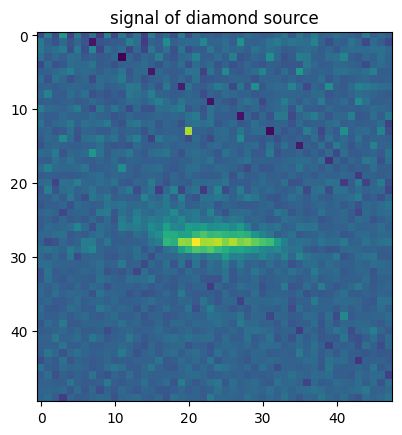

In [35]:
Nx = 48
x_px = np.arange(Nx)
Ny = 50
y_px = np.arange(Ny)


source_gaussian = res
plt.title("signal of diamond source")
plt.imshow(source_gaussian)
plt.show()

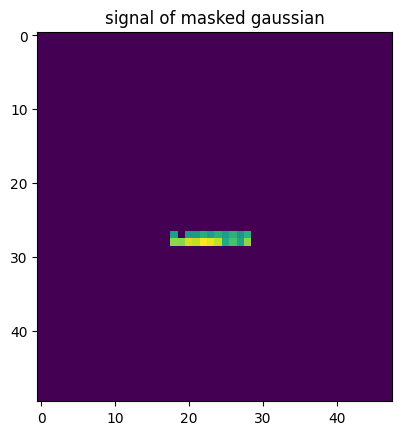

In [11]:
source_gaussian_masked = np.where(source_gaussian>(0.5*np.max(source_gaussian)),source_gaussian,0)
plt.imshow(source_gaussian_masked)
plt.title("signal of masked gaussian")
plt.show()

In [12]:
center_x_px = centroid1(x_px, np.sum(source_gaussian_masked,0))
size_x_px = size_rms1(x_px, np.sum(source_gaussian_masked,0))
print("x-axis center and size:",center_x_px,size_x_px*2.35)

center_y_px = centroid1(y_px, np.sum(source_gaussian_masked,1))
size_y_px = size_rms1(y_px, np.sum(source_gaussian_masked,1))
print("y-axis center and size:",center_y_px,size_y_px*2.35)

x-axis center and size: 23.034490583163148 7.237150971884779
y-axis center and size: 27.610165645563875 1.1461244903557875


# Step 3 collect 100 images and save locally

In [22]:
from PIL import Image
from tqdm import tqdm
import time


number_of_data = 100
data = np.zeros((number_of_data*10,50,48))

In [24]:
# for i in tqdm(range(number_of_data)):
#     subprocess = os.popen('pvget ice-cream/image')
#     ice_cream = subprocess.read()
#     x = ice_cream.split('\n')
    
#     start = find_all("[",x[2])[-1]
#     end = find_all("]",x[2])[-1]
#     value = x[2][start+1:end].split(',')
#     res = [eval(i) for i in value]
#     res = np.resize(np.array(res),(50,48))
#     data[i]=res
#     subprocess.close()
    
#     time.sleep(1)

# for i in tqdm(range(number_of_data)):
#     cmd = "pvget ice-cream/image"
#     process = subprocess.Popen(cmd.split(),
#                         stdout=subprocess.PIPE)
#     processed, _ = process.communicate()
#     ice_cream= processed.decode("utf-8")
#     x = ice_cream.split('\n')

#     start = find_all("[",x[2])[-1]
#     end = find_all("]",x[2])[-1]
#     value = x[2][start+1:end].split(',')
#     res = [eval(i) for i in value]
#     res = np.resize(np.array(res),(50,48))
#     data[i]=res
#     process.kill()
#     process.terminate()
#     time.sleep(1)

folder_index=1

save_path = '/home/bl531/Documents/diamond_images_large/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

for i in tqdm(range(number_of_data)):
    output = subprocess.getoutput('pvget ice-cream/image')
    x = output.split('\n')
    start = find_all("[",x[2])[-1]
    end = find_all("]",x[2])[-1]
    value = x[2][start+1:end].split(',')
    res = [eval(i) for i in value]
    res = np.resize(np.array(res),(50,48))
    #print(res)

    save_image_path = save_path + 'images_tiff_'+str(folder_index)+'/'
    if not os.path.exists(save_image_path):
        os.makedirs(save_image_path)

    im = Image.fromarray(res.astype(np.float32))
    im.save(save_image_path+str(i)+'.tiff',"tiff")

    data[folder_index*100+i]=res



 27%|██▋       | 27/100 [00:10<00:29,  2.47it/s]


IndexError: list index out of range

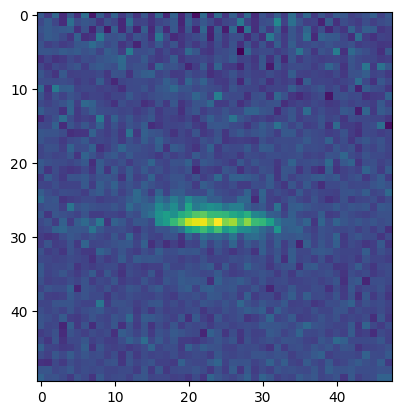

In [21]:
test_index =1
im_png = Image.open(save_path + 'images_tiff_0/'+str(test_index)+'.tiff')
im_png_arr = np.array(im_png)
plt.imshow(im_png_arr)

In [ ]:


#for i_a in tqdm(np.arange(len(mono_angles_deg))):

## choice 1: save all images to .h5 file

In [25]:
import h5py

save_path = '/home/bl531/Documents/diamond_images/'
h5f = h5py.File(save_path + 'dataset'+str(folder_index)+'.h5','w')
h5f.create_dataset('diamond_dataset',data = data)
h5f.close()

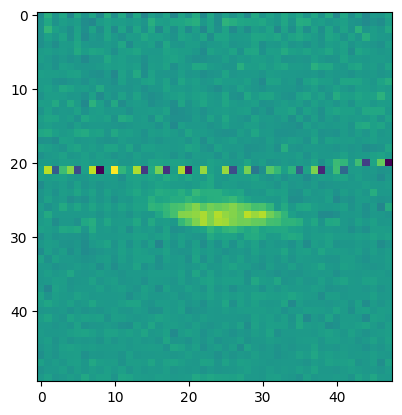

In [27]:
h5f=h5py.File(save_path+'dataset.h5', 'r')
data = h5f['diamond_dataset']
plt.imshow(data[0])
h5f.close()

## choice 2 : save each image separately to png file

In [ ]:
from PIL import Image
for j in range(number_of_data):
    image_arr = data[i]
    save_image_path = save_path + 'images_png/'
    if not os.path.exists(save_image_path):
        os.makedirs(save_image_path)
    im = Image.fromarray(image_arr)
    im = im.convert("L")# 8 bit ints and 8-bit depth for grayscale image
    im.save(save_image_path+str(j)+'.png')


In [ ]:
test_index =1
im_png = Image.open(save_path + 'images_png/'+str(test_index)+'.png')
im_png_arr = np.array(im_png)
plt.imshow(im_png_arr)

## choice 3 save each image separately to tiff file

In [ ]:
for j in range(number_of_data):
    image_arr = data[i]
    save_image_path = save_path + 'images_tiff/'
    if not os.path.exists(save_image_path):
        os.makedirs(save_image_path)

    im = Image.fromarray(image_arr)
    im.save(save_image_path+str(j)+'.tiff',"tiff")

In [ ]:
test_index =1
im_png = Image.open(save_path + 'images_tiff/'+str(test_index)+'.tiff')
im_png_arr = np.array(im_png)
plt.imshow(im_png_arr)

# Step 4: get the avg of 100 images and cal center/size

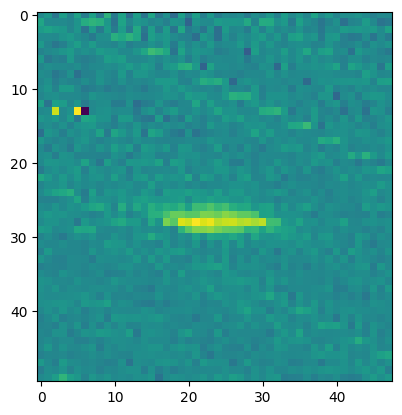

In [48]:
save_path = '/home/bl531/Documents/diamond_images_large/'
data = np.zeros((100,50,48))
for i in range (100):
    im_png = Image.open(save_path + 'images_tiff_0/'+str(i)+'.tiff')
    im_png_arr = np.array(im_png)
    data[i]=im_png_arr
plt.imshow(data[0])

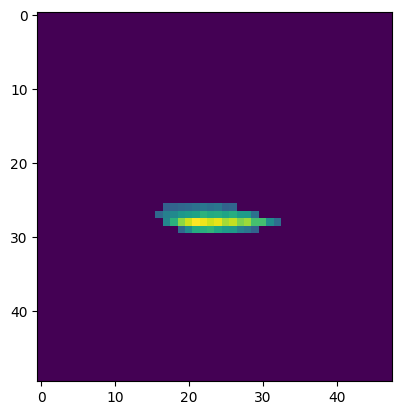

In [49]:
data_avg = np.mean(data,0)
data_avg_masked = np.where(data_avg>(0.3*np.max(data_avg)),data_avg,0)
plt.imshow(data_avg_masked)

In [58]:
avg_center_x_px = centroid1(x_px, np.sum(data_avg_masked,0))
avg_size_x_px = size_rms1(x_px, np.sum(data_avg_masked,0))*2.35
print("x-axis center and size:",avg_center_x_px,avg_size_x_px)
avg_center_y_px = centroid1(y_px, np.sum(data_avg_masked,1))
avg_size_y_px = size_rms1(y_px, np.sum(data_avg_masked,1))*2.35
print("y-axis center and size:",avg_center_y_px,avg_size_y_px)

x-axis center and size: 23.39353973092861 8.84414765940666
y-axis center and size: 27.692555030810997 2.151507494848993


## create a fake gaussian with same center and size

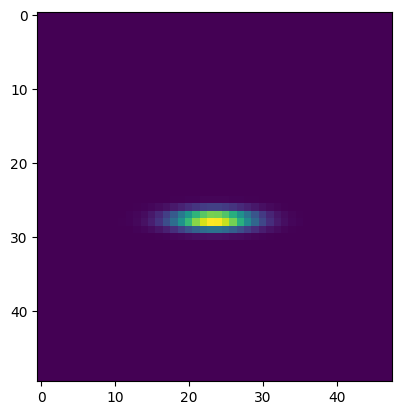

In [59]:
#define the gaussian function
def gaussian(x_px, mean_px, fwhm_px):
    '''
    GAUSSIAN Returns a 1D gaussian
    gaussian(x_px, mean_px, fwhm_px)
    :param x_px: numpy array
    :param mean_px: double
    :param fwhm_px: double
    :return: numpy array
    '''
    sigma_x = fwhm_px/(2*np.sqrt(2*np.log(2)))
    return np.exp(-((x_px-mean_px)/(np.sqrt(2)*sigma_x))**2)
X,Y = np.meshgrid(x_px,y_px)
fake_gaussian = gaussian(X, avg_center_x_px, avg_size_x_px)*gaussian(Y, avg_center_y_px, avg_size_y_px)
plt.imshow(fake_gaussian)

In [67]:
center_x_list=[]
size_x_list=[]
center_y_list=[]
size_y_list=[]
for k in range(data.shape[0]):
    each_data = data[k]

    each_center_x_px = centroid1(x_px, np.sum(each_data,0))
    each_size_x_px = size_rms1(x_px, np.sum(each_data,0))*2.35
    each_center_y_px = centroid1(y_px, np.sum(each_data,1))
    each_size_y_px = size_rms1(y_px, np.sum(each_data,1))*2.35

    center_x_list.append(each_center_x_px)
    size_x_list.append(each_size_x_px)
    center_y_list.append(each_center_y_px)
    size_y_list.append(each_size_y_px)

0.39352666505414663


Text(0, 0.5, 'frequency')

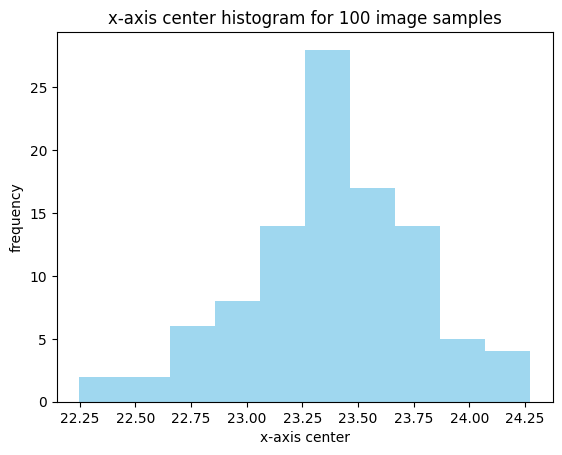

In [68]:
print(np.std(center_x_list))
plt.hist(center_x_list, bins=10,color='skyblue',alpha=0.8)
plt.title('x-axis center histogram for 100 image samples')
plt.xlabel('x-axis center')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

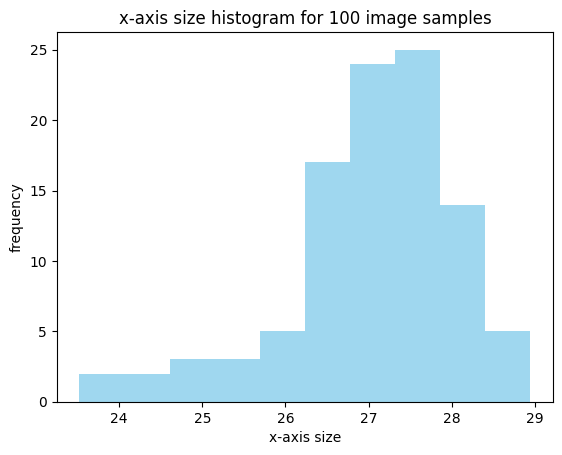

In [69]:
plt.hist(size_x_list, bins=10,color='skyblue',alpha=0.8)
plt.title('x-axis size histogram for 100 image samples')
plt.xlabel('x-axis size')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

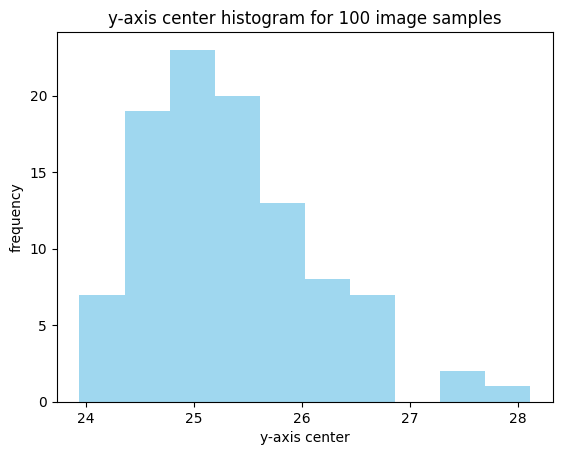

In [70]:
plt.hist(center_y_list, bins=10,color='skyblue',alpha=0.8)
plt.title('y-axis center histogram for 100 image samples')
plt.xlabel('y-axis center')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

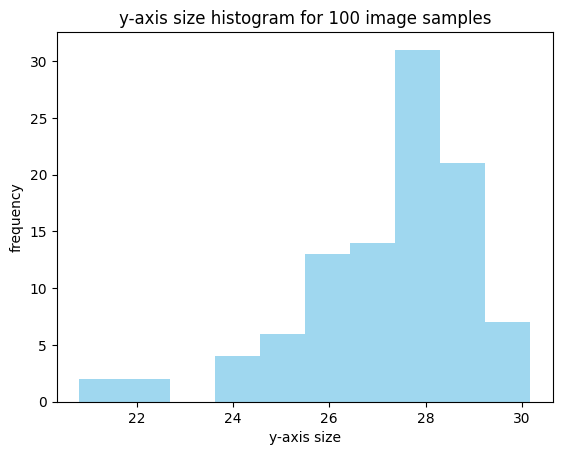

In [71]:
plt.hist(size_y_list, bins=10,color='skyblue',alpha=0.8)
plt.title('y-axis size histogram for 100 image samples')
plt.xlabel('y-axis size')
plt.ylabel('frequency')

# calculate the time for collecting one image

In [57]:
import time
start_time = time.time()
ice_cream_testtime = os.popen('pvget ice-cream/image').read()
end_time = time.time()
time = end_time-start_time
print("time(s) for collecting one image",time)

KeyboardInterrupt: 